In [1]:
"""
Appendix Figures (A1–A3)

This notebook generates supplementary figures for the project appendix.
It relies exclusively on the final processed panel and does not modify data.
"""

'\nAppendix Figures (A1–A3)\n\nThis notebook generates supplementary figures for the project appendix.\nIt relies exclusively on the final processed panel and does not modify data.\n'

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
from pathlib import Path

p = Path.cwd().resolve()
while not (p / "src").exists() and p != p.parent:
    p = p.parent

if not (p / "src").exists():
    raise RuntimeError("Could not find project root containing 'src' folder")

sys.path.insert(0, str(p))
print("Project root:", p)

DATA_PATH = p / "data" / "processed" / "oecd_panel_2010_2023.csv"
FIG_PATH  = p / "results" / "appendix"
FIG_PATH.mkdir(parents=True, exist_ok=True)

plt.style.use("default")


Project root: /Users/martinsinishta/Desktop/oecd-decoupling-classifier


In [10]:
df = pd.read_csv(DATA_PATH)

assert {"gdp_growth", "delta_co2", "decoupled", "year"}.issubset(df.columns)
df.head()


,country,iso3,year,co2,co2_per_capita,delta_co2,gdp_growth,decoupled
0,Australia,AUS,2010,405.026,18.293,-1.951,2.219980,1.0
1,Australia,AUS,2011,403.874,17.966,-1.152,2.407080,1.0
2,Australia,AUS,2012,405.005,17.722,1.131,3.916709,0.0
3,Australia,AUS,2013,397.850,17.122,-7.155,2.602193,1.0
4,Australia,AUS,2014,392.610,16.639,-5.240,2.595284,1.0


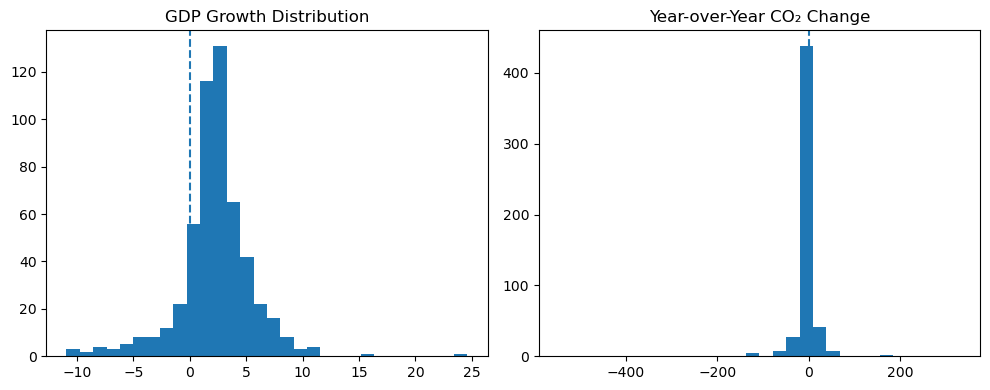

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].hist(df["gdp_growth"], bins=30)
axes[0].axvline(0, linestyle="--")
axes[0].set_title("GDP Growth Distribution")

axes[1].hist(df["delta_co2"], bins=30)
axes[1].axvline(0, linestyle="--")
axes[1].set_title("Year-over-Year CO₂ Change")

plt.tight_layout()
plt.savefig(FIG_PATH / "figure_A1_distributions.png", dpi=300)
plt.show()


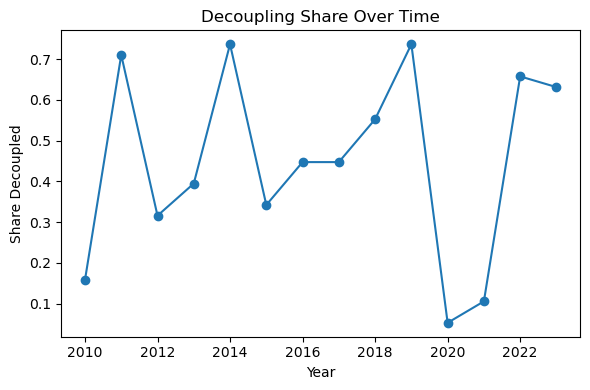

In [12]:
share_by_year = (
    df.groupby("year")["decoupled"]
      .mean()
)

plt.figure(figsize=(6,4))
plt.plot(share_by_year.index, share_by_year.values, marker="o")
plt.ylabel("Share Decoupled")
plt.xlabel("Year")
plt.title("Decoupling Share Over Time")

plt.tight_layout()
plt.savefig(FIG_PATH / "figure_A2_decoupling_share.png", dpi=300)
plt.show()

In [13]:
out = chronological_split(df)
print("len(out):", len(out))

for i, obj in enumerate(out):
    print(f"\n--- out[{i}] ---")
    print("type:", type(obj))
    if hasattr(obj, "shape"):
        print("shape:", obj.shape)
    if hasattr(obj, "columns"):
        print("first columns:", list(obj.columns)[:15])


len(out): 9

--- out[0] ---
type: <class 'pandas.core.frame.DataFrame'>
shape: (456, 3)
first columns: ['gdp_growth', 'co2_per_capita', 'co2']

--- out[1] ---
type: <class 'pandas.core.frame.DataFrame'>
shape: (38, 3)
first columns: ['gdp_growth', 'co2_per_capita', 'co2']

--- out[2] ---
type: <class 'pandas.core.frame.DataFrame'>
shape: (38, 3)
first columns: ['gdp_growth', 'co2_per_capita', 'co2']

--- out[3] ---
type: <class 'pandas.core.series.Series'>
shape: (456,)

--- out[4] ---
type: <class 'pandas.core.series.Series'>
shape: (38,)

--- out[5] ---
type: <class 'pandas.core.series.Series'>
shape: (38,)

--- out[6] ---
type: <class 'pandas.core.frame.DataFrame'>
shape: (456, 8)
first columns: ['country', 'iso3', 'year', 'co2', 'co2_per_capita', 'delta_co2', 'gdp_growth', 'decoupled']

--- out[7] ---
type: <class 'pandas.core.frame.DataFrame'>
shape: (38, 8)
first columns: ['country', 'iso3', 'year', 'co2', 'co2_per_capita', 'delta_co2', 'gdp_growth', 'decoupled']

--- out[8] ---


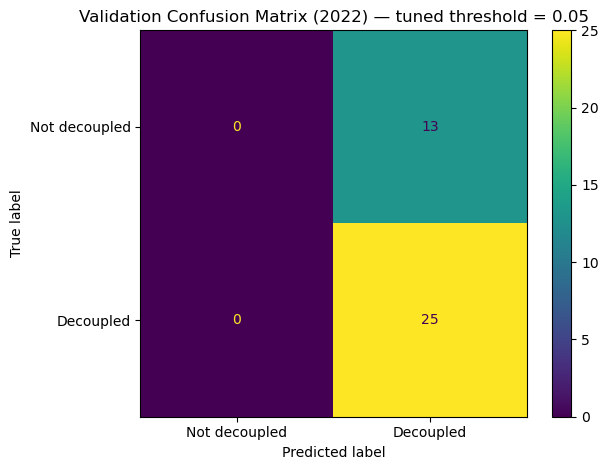

In [14]:
from src.data_loader import chronological_split
from src.models import make_logistic_model
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# split (uses the same logic as main.py)
X_train, X_val, X_test, y_train, y_val, y_test, *_ = chronological_split(df)

# fit logistic model
model = make_logistic_model()
model.fit(X_train, y_train)

# predicted probabilities
p_val = model.predict_proba(X_val)[:, 1]

# tuned threshold from main.py
THRESH = 0.05
y_pred = (p_val >= THRESH).astype(int)

# plot confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_val,
    y_pred,
    display_labels=["Not decoupled", "Decoupled"]
)

plt.title("Validation Confusion Matrix (2022) — tuned threshold = 0.05")
plt.tight_layout()
plt.savefig(FIG_PATH / "figure_A3_confusion_2022.png", dpi=300)
plt.show()
